# TEAM AMSTERDAM

### 1. ACHEAMPONG FRANCIS 
### 2. KERICH MIKE 
### 3. STEPHEN TETTEH OKOE 
### 4. HILDAH WAMBUI 
### 5. REKIA OUEDRAOGO
### 6. CYCUS MURUMBA SITUMA

# Project Title: Store sales analysis and prediction using Regression

# Project Description:

The objective of this project is to analyze the sales data of a store and build a regression model to predict future sales. The data for this project is obtained from a retail store that sells various products, such as food, clothing, electronics, and home appliances.

**The project will be divided into the following stages:**

Perform exploratory data analysis (EDA) to gain insights into the data and identify any trends or patterns.
Data Cleaning and Preparation:

Remove any missing or irrelevant data.
Transform the data into a suitable format for analysis.
Perform feature engineering to create new features from the existing data.

**Model Building:**

Split the data into training and testing sets.
Build a regression model to predict sales, using techniques such as linear regression, polynomial regression, or time-series analysis.
Evaluate the performance of the model using metrics such as R-squared, Mean Squared Error (MSE), and Root Mean Squared Error (RMSE).

**Model Optimization:**

Fine-tune the model by adjusting the hyperparameters to improve its performance.
Validate the model using cross-validation techniques, such as k-fold cross-validation.

**Model Deployment:**

Once the model is optimized, we will deploy it via various platforms(PowerBI, LinkedIn/Medium and Github)

**Expected Deliverables:**

1. A report summarizing the findings of the analysis, including insights into the data and the factors that affect sales.
2. A regression model that accurately predicts future sales, along with the code used to build and deploy the model.

**This project will be implementated in Python, data cleaning and preparation, statistical analysis, and machine learning techniques**

# Suggested Questions
1. Is the train dataset complete (has all the required dates)?

2.  Which dates have the lowest and highest sales for each year?

3.  Did the earthquake impact sales?

4.  Are certain groups of stores selling more products? (Cluster, city,
    state, type)

5.  Are sales affected by promotions, oil prices and holidays?

6.  What analysis can we get from the date and its extractable features?

7.  What is the difference between RMSLE, RMSE, MSE (or why is the MAE
    greater than all of them?)

# Suggested Hypothesis
NULL: Earthquake has significant impact on sales 

Alternative: Earthquake has no significant impact on sales 

# File Descriptions and Data Field Information

## In this Regression Project, we were given 7 different datasets  namely 
1. **train.csv**

-   The training data, comprising time series of features store_nbr, family, 
    and onpromotion as well as the target sales.

    **store_nbr**

-   Identifies the store at which the products are sold.

    **family**

-   identifies the type of product sold.

    **sales**

-   gives the total sales for a product family at a particular store
    at a given date. Fractional values are possible since products can be sold in 
    fractional units (1.5 kg of cheese, for instance, as opposed to 1 bag of chips).

    **onpromotion**

 -  gives the total number of items in a product family that were being promoted at a store at a given date.

2. **test.csv**

-   The test data, having the same features as the training data. You will predict the target sales for the dates in this       file.

-   The dates in the test data are for the 15 days after the last date in the training data.

3. **transaction.csv**

-   Contains date, store_nbr and transaction made on that specific date.

4. **sample_submission.csv**

-   A sample submission file in the correct format.

5. **stores.csv**

-   Store metadata, including city, state, type, and cluster.

-   cluster is a grouping of similar stores.

6. **oil.csv**

-   Daily oil price which includes values during both the train and
    test data timeframes. (Ecuador is an oil-dependent country and its
    economical health is highly vulnerable to shocks in oil prices.)

7. **holidays_events.csv**

-   Holidays and Events, with metadata


**NOTE**: Pay special attention to the transferred column. A holiday
> that is transferred officially falls on that calendar day but was
> moved to another date by the government. A transferred day is more
> like a normal day than a holiday. To find the day that it was
> celebrated, look for the corresponding row where type is **Transfer**.
>
> For example, the holiday Independencia de Guayaquil was transferred
> from 2012-10-09 to 2012-10-12, which means it was celebrated on
> 2012-10-12. Days that are type **Bridge** are extra days that are
> added to a holiday (e.g., to extend the break across a long weekend).
> These are frequently made up by the type **Work Day** which is a day
> not normally scheduled for work (e.g., Saturday) that is meant to
> payback the Bridge.

-   Additional holidays are days added a regular calendar holiday, for
    example, as typically happens around Christmas (making Christmas
    Eve a holiday).

**Additional Notes**

-   Wages in the public sector are paid every two weeks on the 15th and
    on the last day of the month. Supermarket sales could be affected
    by this.

-   A magnitude 7.8 earthquake struck Ecuador on April 16, 2016. People
    rallied in relief efforts donating water and other first need
    products which greatly affected supermarket sales for several
    weeks after the earthquake.




# Package and Libraries Importations

In [1]:
# Data handling
import numpy as np 
import pandas as pd 
import glob

# Vizualisation (Matplotlib, Plotly, Seaborn, etc. )
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns 
sns.set_style('whitegrid')

# import plotly.express as px

from scipy import stats
from scipy.stats import pearsonr

from scipy.stats import chi2_contingency
import plotly.express as px

from scipy.stats import ttest_ind
from datetime import datetime


# Importing the relevant libraries
import IPython.display
import json
import squarify
%matplotlib inline
import missingno as msno
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
color = sns.color_palette()

# D3 modules
#from IPython.core.display import display, HTML, Javascript
from string import Template

# Other packages
import os
import re
#display all columns and rows 
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
import ipywidgets as widgets
from IPython.display import display

#ML models for the regression 
from sklearn.model_selection import train_test_split
#from statsmodels.tsa.arima.model import ARIMA
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor


from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_squared_log_error

import warnings
warnings.filterwarnings('ignore')

The above codes was used to import all packages that help us analyze, clean, visualize our data 

In [5]:
train_data=pd.read_csv("train.csv")
store_data=pd.read_csv("stores.csv")
holiday_data=pd.read_csv("holidays_events.csv")
sample_data=pd.read_csv("sample_submission.csv")
test_data=pd.read_csv("test.csv")
transaction_data=pd.read_csv("transactions.csv")
oil_data=pd.read_csv("oil.csv")

We used the above codes to import all our dataset supplied to us which inludes the Train, Test, stores, holiday_events, transactions, oil and sample data.

We displayed the sample dataset, this is because the sample dataset is idea which our final dataset should look like

In [3]:
sample_data.head(10)

,id,sales
0,3000888,0.0
1,3000889,0.0
2,3000890,0.0
3,3000891,0.0
4,3000892,0.0
5,3000893,0.0
6,3000894,0.0
7,3000895,0.0
8,3000896,0.0
9,3000897,0.0


In [4]:
sample_data.head(10)

,id,sales
0,3000888,0.0
1,3000889,0.0
2,3000890,0.0
3,3000891,0.0
4,3000892,0.0
5,3000893,0.0
6,3000894,0.0
7,3000895,0.0
8,3000896,0.0
9,3000897,0.0


In [5]:
sample_data['sales'].unique()

array([0.])

In [6]:
sample_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28512 entries, 0 to 28511
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      28512 non-null  int64  
 1   sales   28512 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 445.6 KB


In [6]:
sample_data.shape

(28512, 2)

# Displaying the train dataset

In [7]:
train_data.head(10)

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0
2,2,2013-01-01,1,BEAUTY,0.0,0
3,3,2013-01-01,1,BEVERAGES,0.0,0
4,4,2013-01-01,1,BOOKS,0.0,0
5,5,2013-01-01,1,BREAD/BAKERY,0.0,0
6,6,2013-01-01,1,CELEBRATION,0.0,0
7,7,2013-01-01,1,CLEANING,0.0,0
8,8,2013-01-01,1,DAIRY,0.0,0
9,9,2013-01-01,1,DELI,0.0,0


In [8]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 6 columns):
 #   Column       Dtype  
---  ------       -----  
 0   id           int64  
 1   date         object 
 2   store_nbr    int64  
 3   family       object 
 4   sales        float64
 5   onpromotion  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 137.4+ MB


In [9]:
train_data.isnull().sum()

id             0
date           0
store_nbr      0
family         0
sales          0
onpromotion    0
dtype: int64

In [10]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 6 columns):
 #   Column       Dtype  
---  ------       -----  
 0   id           int64  
 1   date         object 
 2   store_nbr    int64  
 3   family       object 
 4   sales        float64
 5   onpromotion  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 137.4+ MB


## Deep dive on the train dataset

In [11]:
train_data['date']=pd.to_datetime(train_data['date'])

<AxesSubplot:xlabel='date'>

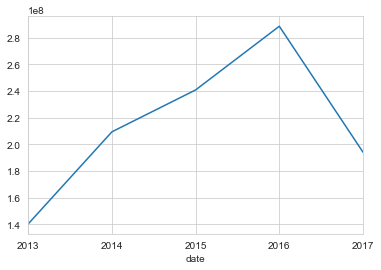

In [12]:
train_data.set_index('date', inplace=True)
sales_by_year=train_data['sales'].resample('Y').sum()

sales_by_year.plot()

In [13]:
train_data.loc['2016-04-16']

,id,store_nbr,family,sales,onpromotion
date,,,,,
2016-04-16,2134836,1,AUTOMOTIVE,6.000000,0
2016-04-16,2134837,1,BABY CARE,0.000000,0
2016-04-16,2134838,1,BEAUTY,4.000000,0
2016-04-16,2134839,1,BEVERAGES,2073.000000,5
2016-04-16,2134840,1,BOOKS,0.000000,0
2016-04-16,2134841,1,BREAD/BAKERY,388.352000,0
2016-04-16,2134842,1,CELEBRATION,34.000000,0
2016-04-16,2134843,1,CLEANING,642.000000,5
2016-04-16,2134844,1,DAIRY,795.000000,2


In [14]:
train_data['onpromotion'].unique()

array([  0,   3,   5,   1,  56,  20,  19,   2,   4,  18,  17,  12,   6,
         7,  10,   9,  50,   8,  16,  42,  51,  13,  15,  47,  21,  40,
        37,  54,  24,  58,  22,  59,  11,  45,  25,  55,  26,  43,  35,
        14,  28,  46,  36,  32,  53,  57,  27,  39,  41,  30,  29,  49,
        23,  48,  44,  38,  31,  52,  33,  34,  61,  60, 116,  86,  73,
       113, 102,  68, 104,  93,  70,  92, 121,  72, 178, 174, 161, 118,
       105, 172, 163, 167, 142, 154, 133, 180, 181, 173, 165, 168, 186,
       140, 149, 145, 169, 188,  62,  84, 111,  65, 107,  63, 101,  87,
       125,  94, 114, 171, 153, 170, 166, 141, 155, 179, 192, 131, 147,
       151, 189,  79,  74, 110,  64,  67,  99, 123, 157, 117, 150, 182,
       162, 160, 194, 135, 190,  69, 108,  89, 126, 156, 103, 146, 132,
       177, 164, 176, 112,  75, 109,  91, 128, 175, 187, 148, 137, 184,
       196, 144, 158, 119, 106,  66, 100,  90, 120, 115,  98, 159, 152,
       185, 139, 143,  80, 124,  71, 134, 193,  78,  88, 122, 13

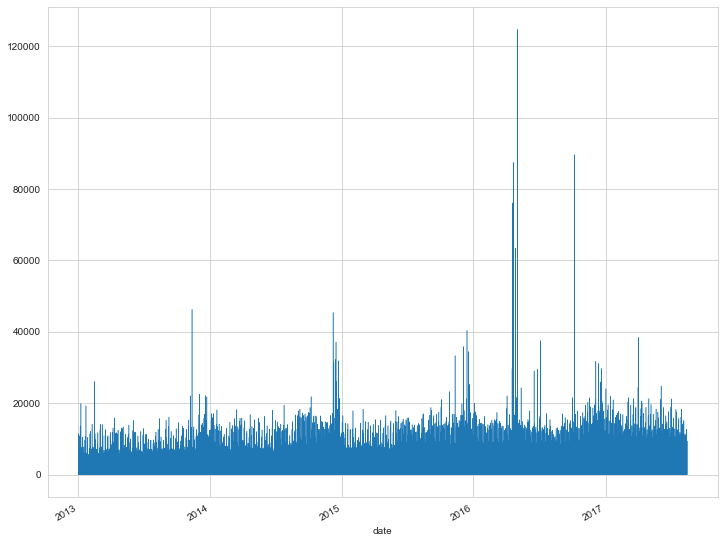

In [15]:
plt.figure(figsize=(12,10))
train_data['sales'].plot(linewidth=0.5)

plt.show()

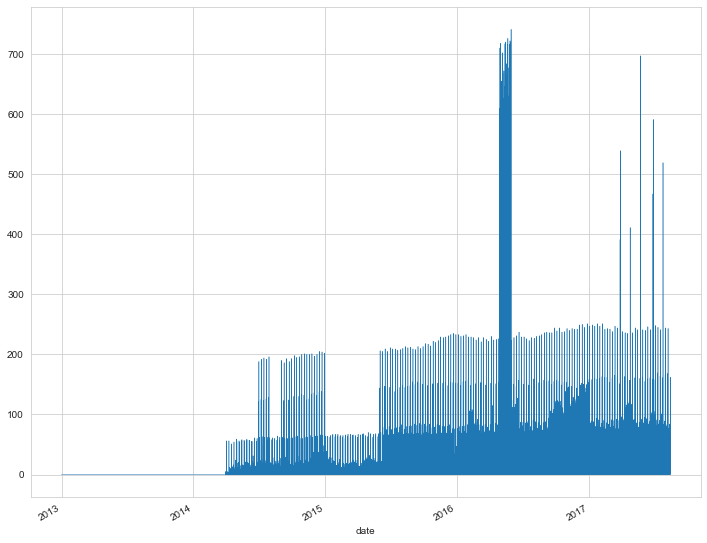

In [16]:
plt.figure(figsize=(12,10))
train_data['onpromotion'].plot(linewidth=0.5)

plt.show()

In [18]:
transaction_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83488 entries, 0 to 83487
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   date          83488 non-null  object
 1   store_nbr     83488 non-null  int64 
 2   transactions  83488 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 1.9+ MB


In [19]:
transaction_data['date']=pd.to_datetime(transaction_data['date'])

In [20]:
transaction_data.set_index('date', inplace=True)

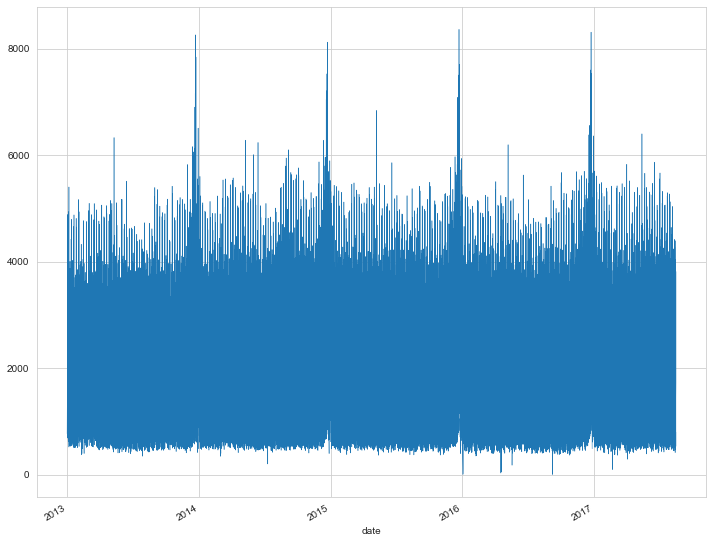

In [21]:
plt.figure(figsize=(12,10))
transaction_data['transactions'].plot(linewidth=0.5)

plt.show()

In [22]:
transaction_data.head()

,store_nbr,transactions
date,,
2013-01-01,25,770
2013-01-02,1,2111
2013-01-02,2,2358
2013-01-02,3,3487
2013-01-02,4,1922


# Observation on train dataset

- The train data has no null values
- Date column needs to be changed to date datatype and set as index
- The family column has an (str) datatype and this has to be changed to acceptable formate for ML 
- Finally all of the columns will have to be in the same datatype in order to be ready for ML

- We think the dataset (train) is small and therefore we will add other provided dataset to make it large enough to improve the performance of our model. We may include the following datasets
- holidays_events.csv
- Stores.csv
- transactions.csv
- Oil.csv

# The team followed the following steps to handle  Data

1)Merge columns in other csv files into the train.csv file

2)Remove the resulting NAs from the final dataset to ensure good performance 

3)DO a correlation analysis to see if the columns actually correlate to the predicted column

4)Drop columns that do not have relation to the sales (target) variable


# Data preparation

In [23]:
train_data.head()

,id,store_nbr,family,sales,onpromotion
date,,,,,
2013-01-01,0,1,AUTOMOTIVE,0.0,0
2013-01-01,1,1,BABY CARE,0.0,0
2013-01-01,2,1,BEAUTY,0.0,0
2013-01-01,3,1,BEVERAGES,0.0,0
2013-01-01,4,1,BOOKS,0.0,0


In [24]:
train_data.shape

(3000888, 5)

In [25]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3000888 entries, 2013-01-01 to 2017-08-15
Data columns (total 5 columns):
 #   Column       Dtype  
---  ------       -----  
 0   id           int64  
 1   store_nbr    int64  
 2   family       object 
 3   sales        float64
 4   onpromotion  int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 169.6+ MB


In [26]:
store_data.head()

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4


In [34]:
store_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   store_nbr  54 non-null     int64 
 1   city       54 non-null     object
 2   state      54 non-null     object
 3   type       54 non-null     object
 4   cluster    54 non-null     int64 
dtypes: int64(2), object(3)
memory usage: 2.2+ KB


In [35]:
store_data.shape

(54, 5)

In [36]:
store_data.isnull().sum()

store_nbr    0
city         0
state        0
type         0
cluster      0
dtype: int64

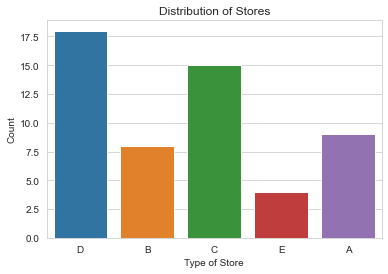

In [37]:
sns.countplot(x='type', data=store_data)

plt.title('Distribution of Stores')
plt.xlabel('Type of Store')
plt.ylabel('Count')

plt.show()

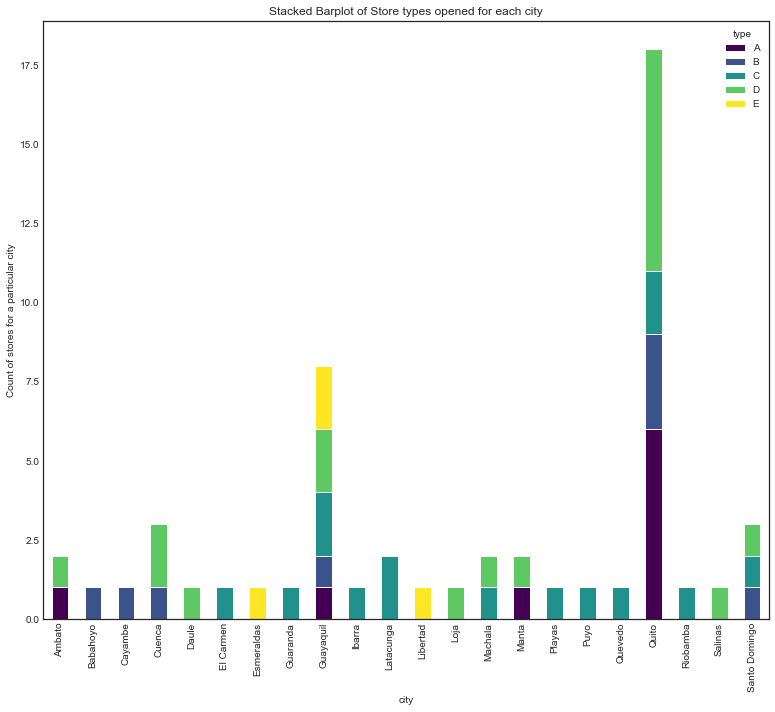

In [119]:
plt.style.use('seaborn-white')
cluster = store_data.groupby(['city','type']).store_nbr.size()
cluster.unstack().plot(kind='bar',stacked=True, colormap= 'viridis', figsize=(13,11),  grid=False)
plt.title('Stacked Barplot of Store types opened for each city')
plt.ylabel('Count of stores for a particular city')


plt.show()

Text(0.5, 1.0, 'Store numbers and the clusters they are assigned to')

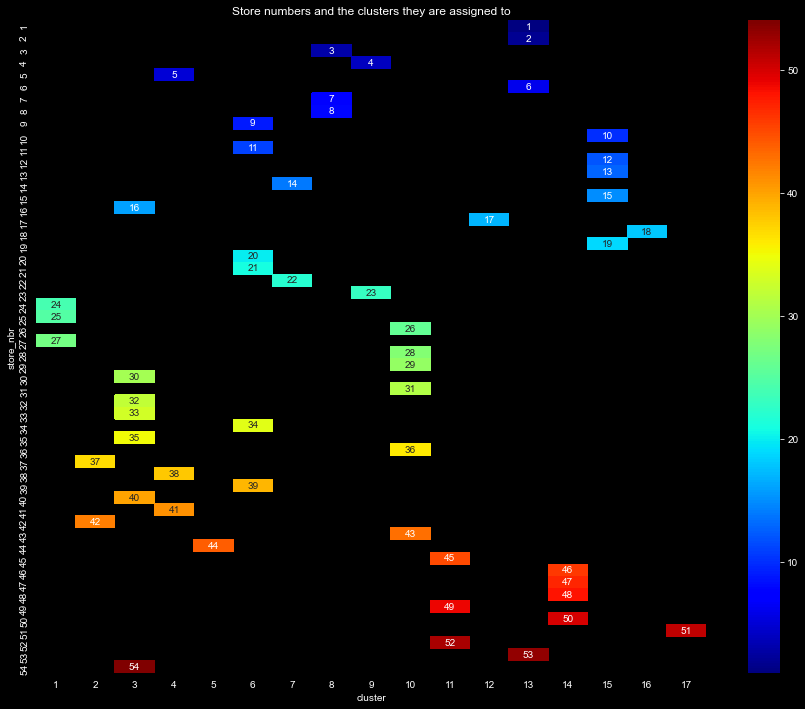

In [112]:
# Finally plot the seaborn heatmap
plt.style.use('dark_background')
plt.figure(figsize=(15,12))
store_pivot = store_data.dropna().pivot("store_nbr","cluster", "store_nbr")
ax = sns.heatmap(store_pivot, cmap='jet', annot=True, linewidths=0, linecolor='white')
plt.title('Store numbers and the clusters they are assigned to')

From visualising the store numbers side-by-side based on the clustering, we can identify certain patterns. For example clusters 3, 6, 10 and 15 are the most common store clusters based off the fact that there are more store_nbrs attributed to them then the others while on the other end of the spectrum, we have clusters 5 and 17 which are only related to the stores 44 and 51 respectively.

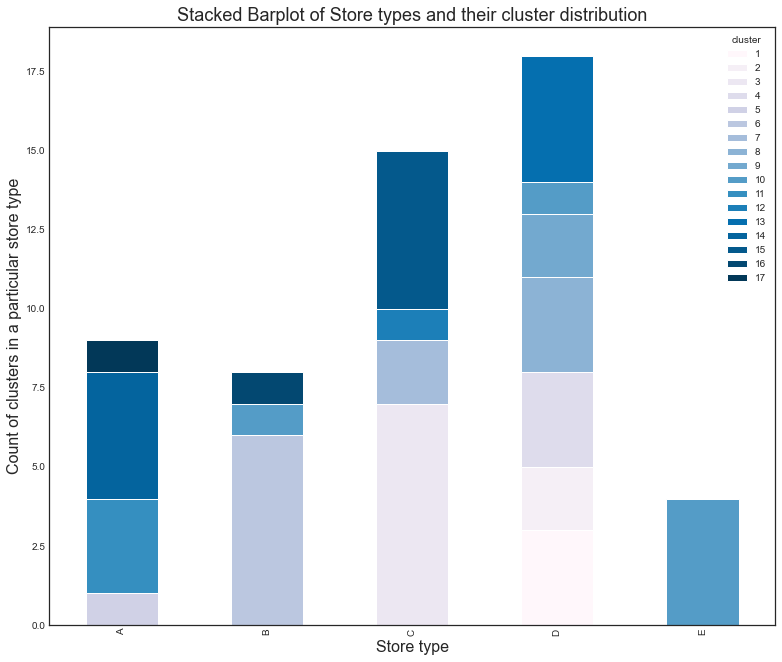

In [114]:
plt.style.use('seaborn-white')
type_cluster = store_data.groupby(['type','cluster']).size()
type_cluster.unstack().plot(kind='bar',stacked=True, colormap= 'PuBu', figsize=(13,11),  grid=False)
plt.title('Stacked Barplot of Store types and their cluster distribution', fontsize=18)
plt.ylabel('Count of clusters in a particular store type', fontsize=16)
plt.xlabel('Store type', fontsize=16)


plt.show()

we can look at the distribution of clusters based on the store type to see if we can identify any apparent relationship between types and the way the company has decided to cluster the particular store

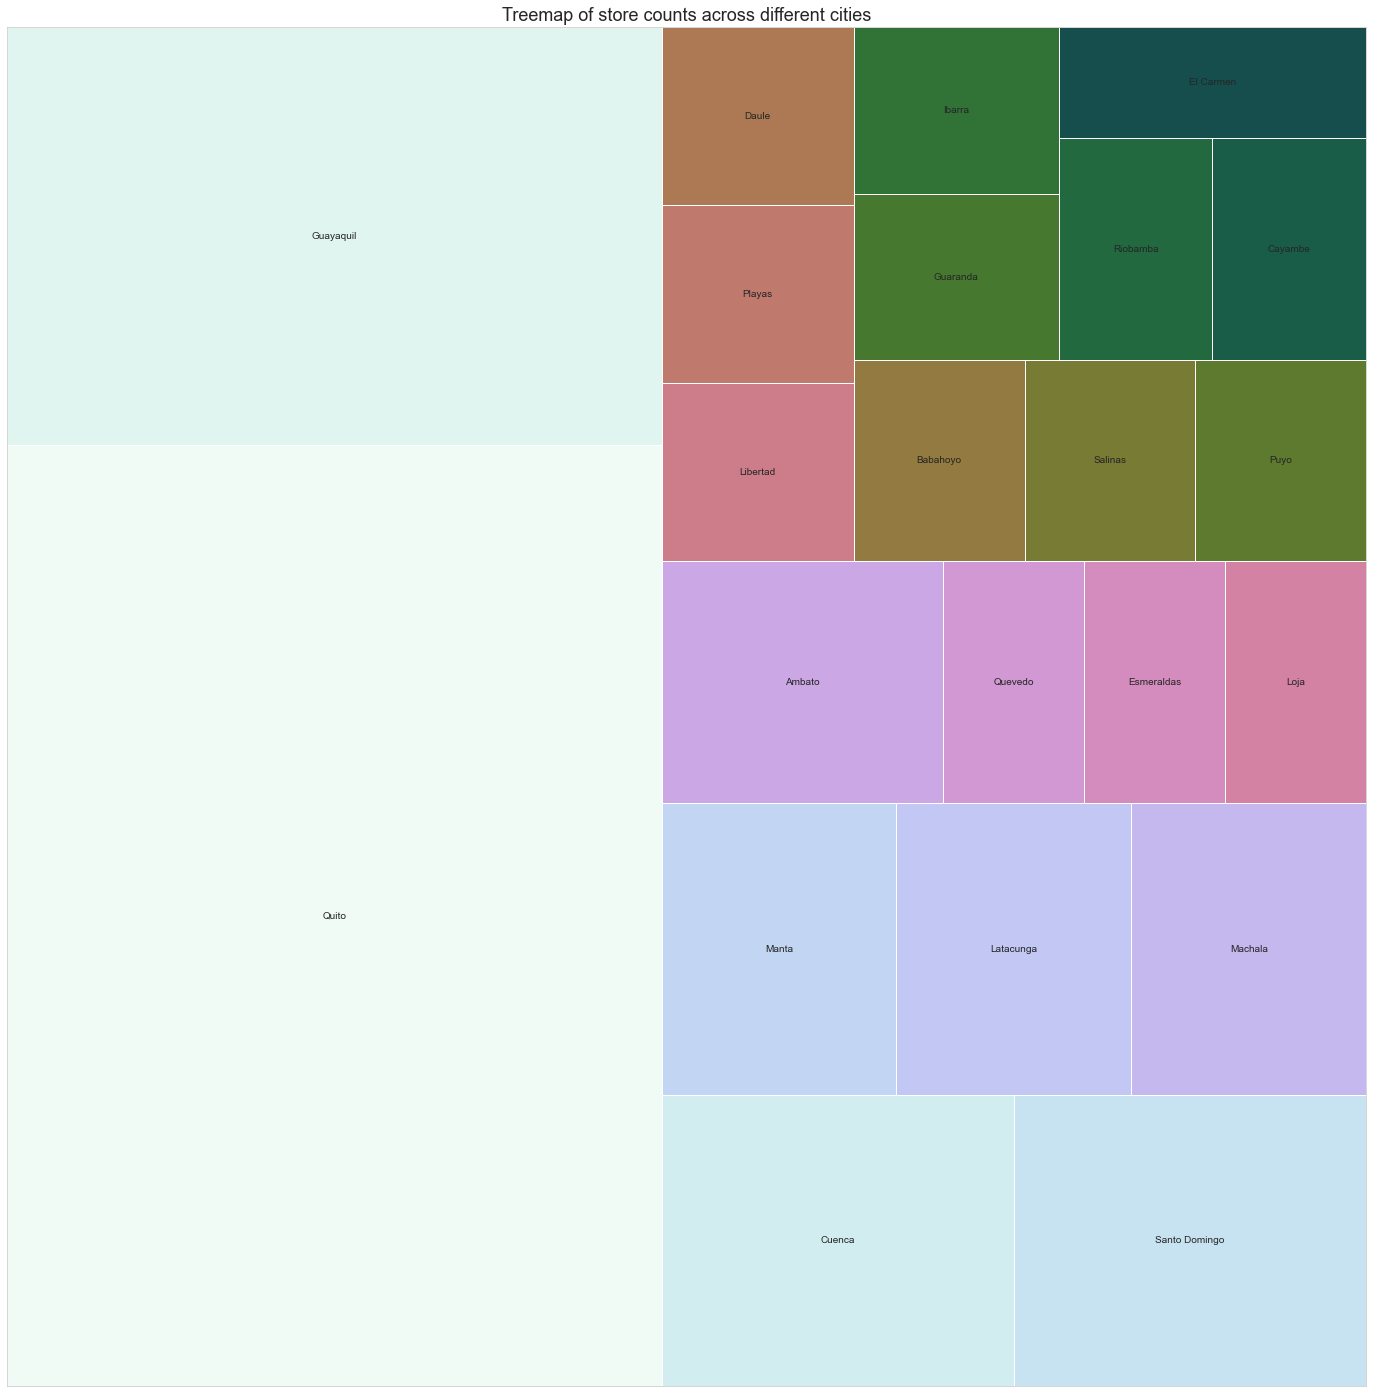

In [108]:
fig = plt.figure(figsize=(25, 21))
marrimeko=store_data.city.value_counts().to_frame()
ax = fig.add_subplot(111, aspect="equal")
ax = squarify.plot(sizes=marrimeko['city'].values,label=marrimeko.index,
              color=sns.color_palette('cubehelix_r', 28), alpha=1)
ax.set_xticks([])
ax.set_yticks([])
fig=plt.gcf()
fig.set_size_inches(40,25)
plt.title("Treemap of store counts across different cities", fontsize=18)

plt.show()

Guayaquil and Quito are two cities that stand out in terms of the range of retail kinds available. These are unsurprising given that Quito is Ecuador's capital and Guayaquil is the country's largest and most populated metropolis. As a result, one might expect Corporacion Favorita to target these major cities with the most diverse store types, as evidenced by the highest counts of store nbrs attributed to those two cities.

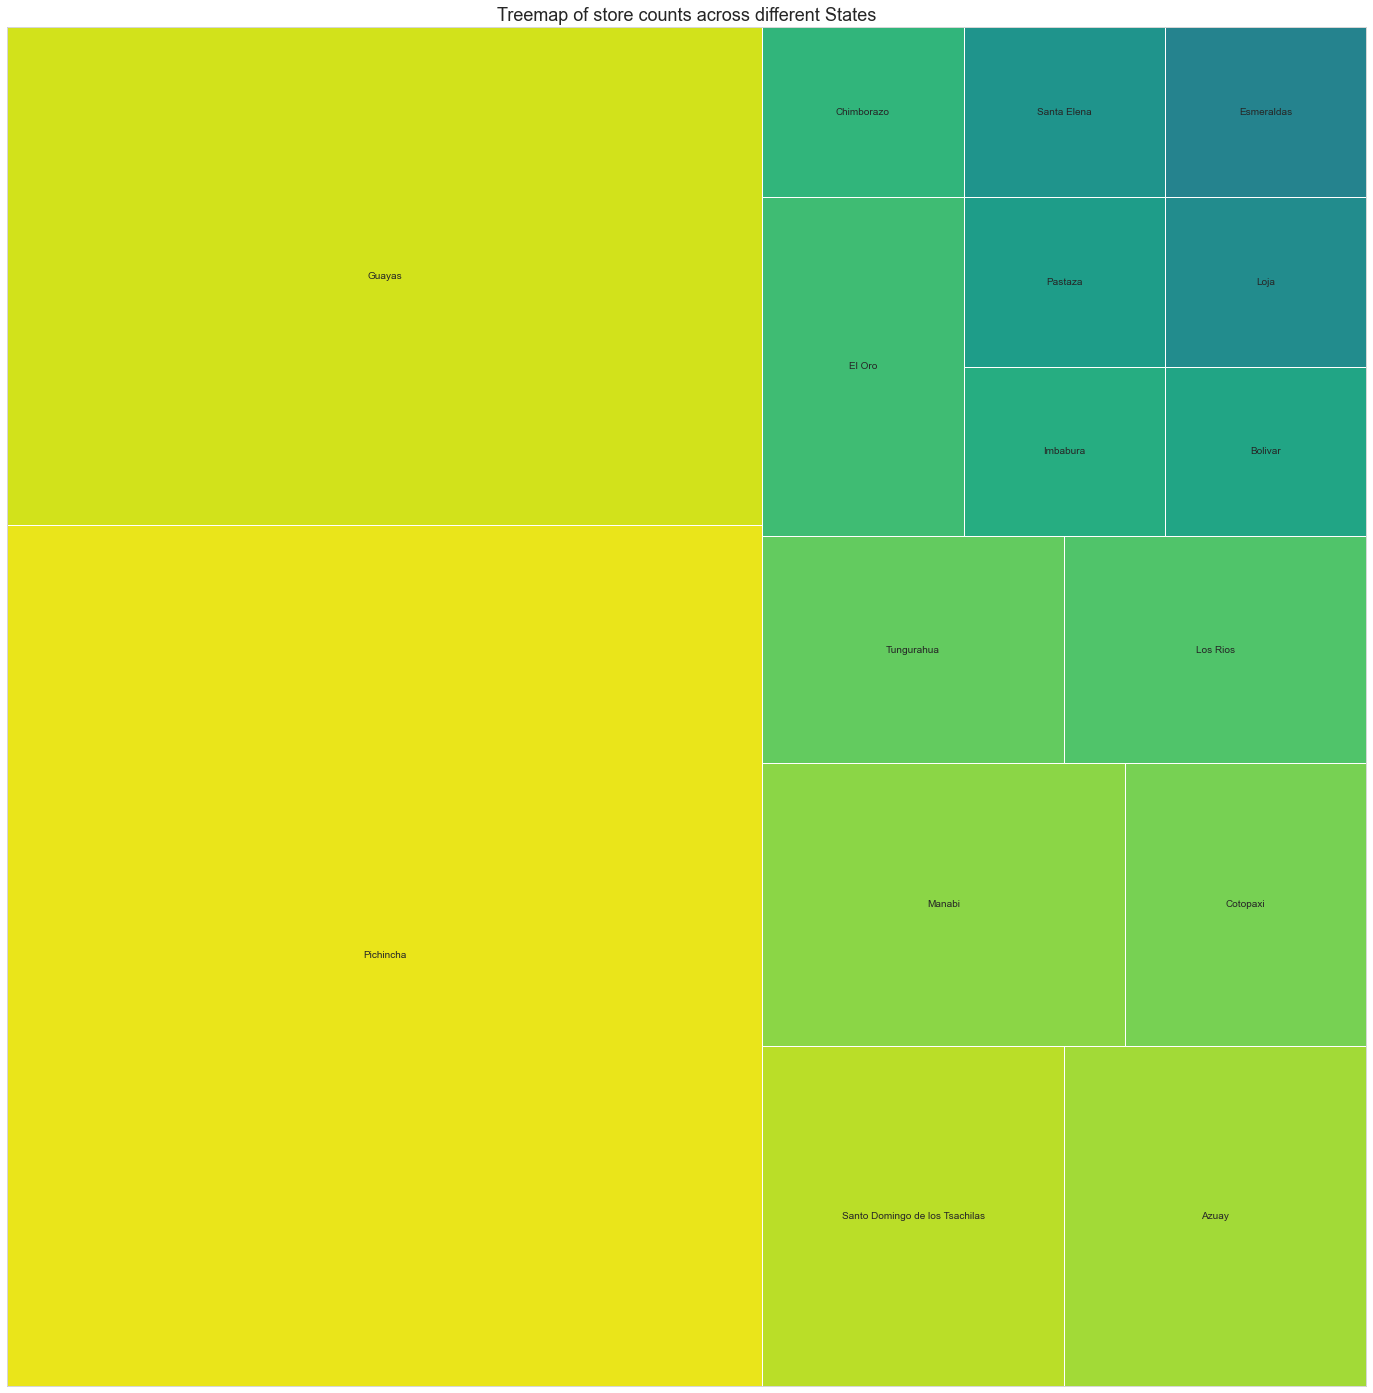

In [109]:
fig = plt.figure(figsize=(25, 21))
marrimeko=store_data.state.value_counts().to_frame()
ax = fig.add_subplot(111, aspect="equal")
ax = squarify.plot(sizes=marrimeko['state'].values,label=marrimeko.index,
              color=sns.color_palette('viridis_r', 28), alpha=1)
ax.set_xticks([])
ax.set_yticks([])
fig=plt.gcf()
fig.set_size_inches(40,25)
plt.title("Treemap of store counts across different States", fontsize=18)


plt.show()

In [47]:
merged_train_store = pd.merge(train_data, store_data, on='store_nbr')

In [48]:
merged_train_store.head()

,id,date,store_nbr,family,sales,onpromotion,city,state,type,cluster
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,Quito,Pichincha,D,13
1,1,2013-01-01,1,BABY CARE,0.0,0,Quito,Pichincha,D,13
2,2,2013-01-01,1,BEAUTY,0.0,0,Quito,Pichincha,D,13
3,3,2013-01-01,1,BEVERAGES,0.0,0,Quito,Pichincha,D,13
4,4,2013-01-01,1,BOOKS,0.0,0,Quito,Pichincha,D,13


In [49]:
merged_train_store.rename(columns={'type':'store_type'}, inplace=True)

In [50]:
merged_train_store.head()

,id,date,store_nbr,family,sales,onpromotion,city,state,store_type,cluster
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,Quito,Pichincha,D,13
1,1,2013-01-01,1,BABY CARE,0.0,0,Quito,Pichincha,D,13
2,2,2013-01-01,1,BEAUTY,0.0,0,Quito,Pichincha,D,13
3,3,2013-01-01,1,BEVERAGES,0.0,0,Quito,Pichincha,D,13
4,4,2013-01-01,1,BOOKS,0.0,0,Quito,Pichincha,D,13


In [51]:
merged_train_store.shape

(3000888, 10)

Displaying holiday events dataset

In [52]:
holiday_data.head()

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False


In [53]:
holiday_data.isnull().sum()

date           0
type           0
locale         0
locale_name    0
description    0
transferred    0
dtype: int64

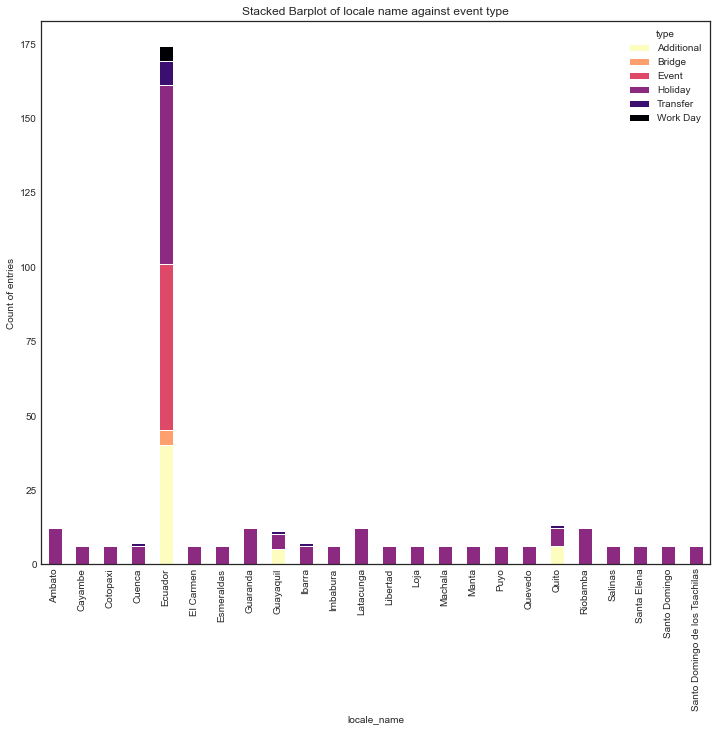

In [118]:
plt.style.use('seaborn-white')
type = holiday_data.groupby(['locale_name', 'type']).size()
type.unstack().plot(kind='bar',stacked=True, colormap= 'magma_r', figsize=(12,10),  grid=False)
plt.title('Stacked Barplot of locale name against event type')
plt.ylabel('Count of entries')

plt.show()

In [54]:
merged_train_store_holiday=pd.merge(merged_train_store, holiday_data, on='date')

In [55]:
merged_train_store_holiday.head()

,id,date,store_nbr,family,sales,onpromotion,city,state,store_type,cluster,type,locale,locale_name,description,transferred
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,Quito,Pichincha,D,13,Holiday,National,Ecuador,Primer dia del ano,False
1,1,2013-01-01,1,BABY CARE,0.0,0,Quito,Pichincha,D,13,Holiday,National,Ecuador,Primer dia del ano,False
2,2,2013-01-01,1,BEAUTY,0.0,0,Quito,Pichincha,D,13,Holiday,National,Ecuador,Primer dia del ano,False
3,3,2013-01-01,1,BEVERAGES,0.0,0,Quito,Pichincha,D,13,Holiday,National,Ecuador,Primer dia del ano,False
4,4,2013-01-01,1,BOOKS,0.0,0,Quito,Pichincha,D,13,Holiday,National,Ecuador,Primer dia del ano,False


In [56]:
merged_train_store_holiday.rename(columns={'type':'holiday_type'}, inplace=True)

In [57]:
merged_train_store_holiday.head()

,id,date,store_nbr,family,sales,onpromotion,city,state,store_type,cluster,holiday_type,locale,locale_name,description,transferred
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,Quito,Pichincha,D,13,Holiday,National,Ecuador,Primer dia del ano,False
1,1,2013-01-01,1,BABY CARE,0.0,0,Quito,Pichincha,D,13,Holiday,National,Ecuador,Primer dia del ano,False
2,2,2013-01-01,1,BEAUTY,0.0,0,Quito,Pichincha,D,13,Holiday,National,Ecuador,Primer dia del ano,False
3,3,2013-01-01,1,BEVERAGES,0.0,0,Quito,Pichincha,D,13,Holiday,National,Ecuador,Primer dia del ano,False
4,4,2013-01-01,1,BOOKS,0.0,0,Quito,Pichincha,D,13,Holiday,National,Ecuador,Primer dia del ano,False


In [58]:
merged_train_store_holiday.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 502524 entries, 0 to 502523
Data columns (total 15 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            502524 non-null  int64  
 1   date          502524 non-null  object 
 2   store_nbr     502524 non-null  int64  
 3   family        502524 non-null  object 
 4   sales         502524 non-null  float64
 5   onpromotion   502524 non-null  int64  
 6   city          502524 non-null  object 
 7   state         502524 non-null  object 
 8   store_type    502524 non-null  object 
 9   cluster       502524 non-null  int64  
 10  holiday_type  502524 non-null  object 
 11  locale        502524 non-null  object 
 12  locale_name   502524 non-null  object 
 13  description   502524 non-null  object 
 14  transferred   502524 non-null  bool   
dtypes: bool(1), float64(1), int64(4), object(9)
memory usage: 58.0+ MB


In [59]:
merged_train_store_holiday.shape

(502524, 15)

In [60]:
transaction_data.head()

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922


In [61]:
transaction_data.isnull().sum()

date            0
store_nbr       0
transactions    0
dtype: int64

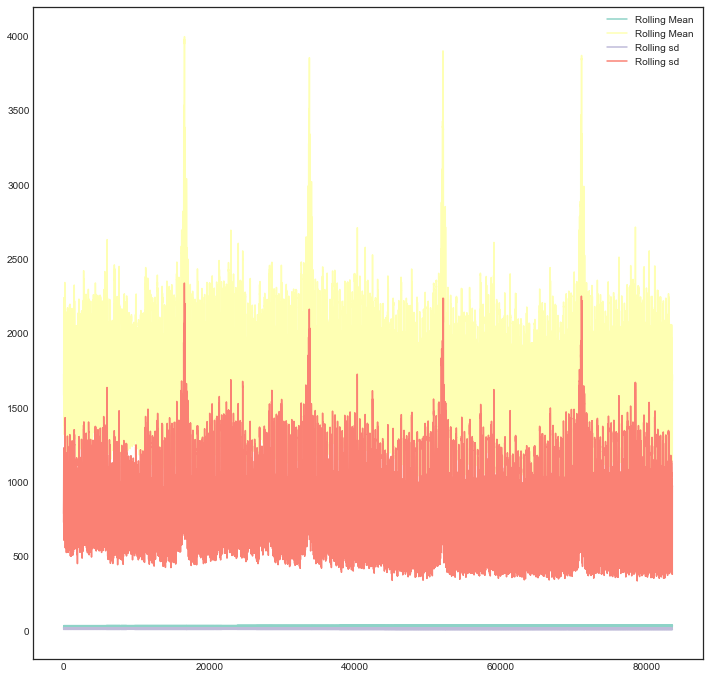

In [116]:
#does the transactions peak at holiday events?
plt.figure(figsize=(12,12))
plt.plot(transaction_data.rolling(window=30,center=False).mean(),label='Rolling Mean');
plt.plot(transaction_data.rolling(window=30,center=False).std(),label='Rolling sd');


plt.legend()

In [62]:
merged_train_store_holiday_transaction=pd.merge(merged_train_store_holiday,transaction_data, on=['date','store_nbr'])

In [63]:
merged_train_store_holiday_transaction.head()

,id,date,store_nbr,family,sales,onpromotion,city,state,store_type,cluster,holiday_type,locale,locale_name,description,transferred,transactions
0,561,2013-01-01,25,AUTOMOTIVE,0.0,0,Salinas,Santa Elena,D,1,Holiday,National,Ecuador,Primer dia del ano,False,770
1,562,2013-01-01,25,BABY CARE,0.0,0,Salinas,Santa Elena,D,1,Holiday,National,Ecuador,Primer dia del ano,False,770
2,563,2013-01-01,25,BEAUTY,2.0,0,Salinas,Santa Elena,D,1,Holiday,National,Ecuador,Primer dia del ano,False,770
3,564,2013-01-01,25,BEVERAGES,810.0,0,Salinas,Santa Elena,D,1,Holiday,National,Ecuador,Primer dia del ano,False,770
4,565,2013-01-01,25,BOOKS,0.0,0,Salinas,Santa Elena,D,1,Holiday,National,Ecuador,Primer dia del ano,False,770


In [64]:
oil_data.head()

,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20


In [65]:
oil_data.shape

(1218, 2)

In [66]:
oil_data.isnull().sum()

date           0
dcoilwtico    43
dtype: int64

In [67]:
oil_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        1218 non-null   object 
 1   dcoilwtico  1175 non-null   float64
dtypes: float64(1), object(1)
memory usage: 19.2+ KB


In [68]:
merged_train_store_holiday_transaction_oil=pd.merge(merged_train_store_holiday_transaction,oil_data, on='date')

In [69]:
merged_train_store_holiday_transaction_oil.head()

,id,date,store_nbr,family,sales,onpromotion,city,state,store_type,cluster,holiday_type,locale,locale_name,description,transferred,transactions,dcoilwtico
0,561,2013-01-01,25,AUTOMOTIVE,0.0,0,Salinas,Santa Elena,D,1,Holiday,National,Ecuador,Primer dia del ano,False,770,NaN
1,562,2013-01-01,25,BABY CARE,0.0,0,Salinas,Santa Elena,D,1,Holiday,National,Ecuador,Primer dia del ano,False,770,NaN
2,563,2013-01-01,25,BEAUTY,2.0,0,Salinas,Santa Elena,D,1,Holiday,National,Ecuador,Primer dia del ano,False,770,NaN
3,564,2013-01-01,25,BEVERAGES,810.0,0,Salinas,Santa Elena,D,1,Holiday,National,Ecuador,Primer dia del ano,False,770,NaN
4,565,2013-01-01,25,BOOKS,0.0,0,Salinas,Santa Elena,D,1,Holiday,National,Ecuador,Primer dia del ano,False,770,NaN


In [70]:
merged_train_store_holiday_transaction_oil.shape

(322047, 17)

In [71]:
merged_train_store_holiday_transaction_oil.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 322047 entries, 0 to 322046
Data columns (total 17 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            322047 non-null  int64  
 1   date          322047 non-null  object 
 2   store_nbr     322047 non-null  int64  
 3   family        322047 non-null  object 
 4   sales         322047 non-null  float64
 5   onpromotion   322047 non-null  int64  
 6   city          322047 non-null  object 
 7   state         322047 non-null  object 
 8   store_type    322047 non-null  object 
 9   cluster       322047 non-null  int64  
 10  holiday_type  322047 non-null  object 
 11  locale        322047 non-null  object 
 12  locale_name   322047 non-null  object 
 13  description   322047 non-null  object 
 14  transferred   322047 non-null  bool   
 15  transactions  322047 non-null  int64  
 16  dcoilwtico    300003 non-null  float64
dtypes: bool(1), float64(2), int64(5), object(9)
memo

In [72]:
merged_train_store_holiday_transaction_oil.isnull().sum()

id                  0
date                0
store_nbr           0
family              0
sales               0
onpromotion         0
city                0
state               0
store_type          0
cluster             0
holiday_type        0
locale              0
locale_name         0
description         0
transferred         0
transactions        0
dcoilwtico      22044
dtype: int64

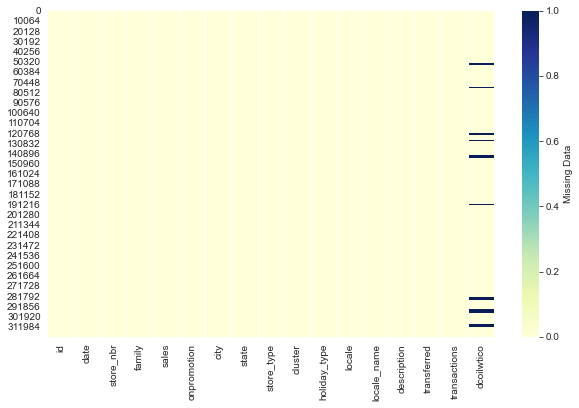

In [73]:
#Graph of how nas has affected our dataset
plt.figure(figsize=(10,6))
sns.heatmap(merged_train_store_holiday_transaction_oil.isna(),
            cmap="YlGnBu",
            cbar_kws={'label': 'Missing Data'})

plt.show()

It can be observed that 'dcoilwtico' has a lot of missing values at different location as seen above, the team therefore 
use the simple imputter method to replace the missing values with mean

In [74]:
merged_train_store_holiday_transaction_oil.head()

,id,date,store_nbr,family,sales,onpromotion,city,state,store_type,cluster,holiday_type,locale,locale_name,description,transferred,transactions,dcoilwtico
0,561,2013-01-01,25,AUTOMOTIVE,0.0,0,Salinas,Santa Elena,D,1,Holiday,National,Ecuador,Primer dia del ano,False,770,NaN
1,562,2013-01-01,25,BABY CARE,0.0,0,Salinas,Santa Elena,D,1,Holiday,National,Ecuador,Primer dia del ano,False,770,NaN
2,563,2013-01-01,25,BEAUTY,2.0,0,Salinas,Santa Elena,D,1,Holiday,National,Ecuador,Primer dia del ano,False,770,NaN
3,564,2013-01-01,25,BEVERAGES,810.0,0,Salinas,Santa Elena,D,1,Holiday,National,Ecuador,Primer dia del ano,False,770,NaN
4,565,2013-01-01,25,BOOKS,0.0,0,Salinas,Santa Elena,D,1,Holiday,National,Ecuador,Primer dia del ano,False,770,NaN


In [75]:
mode = merged_train_store_holiday_transaction_oil['dcoilwtico'].mode()[0]

In [76]:
mode

107.04

In [77]:
#Replacing the missing values with the mode in that column, which is 107.04
merged_train_store_holiday_transaction_oil['dcoilwtico'].fillna(mode, inplace=True)

In [78]:
merged_train_store_holiday_transaction_oil.isnull().sum()

id              0
date            0
store_nbr       0
family          0
sales           0
onpromotion     0
city            0
state           0
store_type      0
cluster         0
holiday_type    0
locale          0
locale_name     0
description     0
transferred     0
transactions    0
dcoilwtico      0
dtype: int64

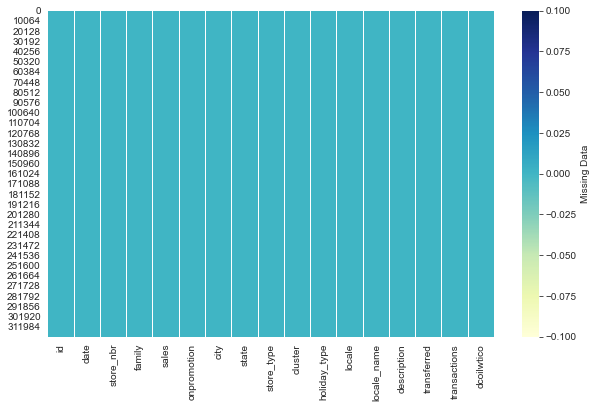

In [79]:
#Graph of how nas has affected our dataset
plt.figure(figsize=(10,6))
sns.heatmap(merged_train_store_holiday_transaction_oil.isna(),
            cmap="YlGnBu",
            cbar_kws={'label': 'Missing Data'})

plt.show()

We have been able replaced all missing values with the mena using the simple imputter method/strategy

In [80]:
merged_train_store_holiday_transaction_oil.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 322047 entries, 0 to 322046
Data columns (total 17 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            322047 non-null  int64  
 1   date          322047 non-null  object 
 2   store_nbr     322047 non-null  int64  
 3   family        322047 non-null  object 
 4   sales         322047 non-null  float64
 5   onpromotion   322047 non-null  int64  
 6   city          322047 non-null  object 
 7   state         322047 non-null  object 
 8   store_type    322047 non-null  object 
 9   cluster       322047 non-null  int64  
 10  holiday_type  322047 non-null  object 
 11  locale        322047 non-null  object 
 12  locale_name   322047 non-null  object 
 13  description   322047 non-null  object 
 14  transferred   322047 non-null  bool   
 15  transactions  322047 non-null  int64  
 16  dcoilwtico    322047 non-null  float64
dtypes: bool(1), float64(2), int64(5), object(9)
memo

Here we need to change the date column datatype from Object(str) to datelike format for our analysis

In [81]:
merged_train_store_holiday_transaction_oil['date']=pd.to_datetime(merged_train_store_holiday_transaction_oil['date'])

In [82]:
merged_train_store_holiday_transaction_oil.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 322047 entries, 0 to 322046
Data columns (total 17 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            322047 non-null  int64         
 1   date          322047 non-null  datetime64[ns]
 2   store_nbr     322047 non-null  int64         
 3   family        322047 non-null  object        
 4   sales         322047 non-null  float64       
 5   onpromotion   322047 non-null  int64         
 6   city          322047 non-null  object        
 7   state         322047 non-null  object        
 8   store_type    322047 non-null  object        
 9   cluster       322047 non-null  int64         
 10  holiday_type  322047 non-null  object        
 11  locale        322047 non-null  object        
 12  locale_name   322047 non-null  object        
 13  description   322047 non-null  object        
 14  transferred   322047 non-null  bool          
 15  transactions  322

Now we are satisfied with our data cleaning and preparation stage. 
We will save this file to safe us time for going over this same process anytime.

In [83]:
merged_train_store_holiday_transaction_oil.to_csv('train_data.csv')

In [8]:
train_final=pd.read_csv('train_data.csv')

In [85]:
train_final.head()

,Unnamed: 0,id,date,store_nbr,family,sales,onpromotion,city,state,store_type,cluster,holiday_type,locale,locale_name,description,transferred,transactions,dcoilwtico
0,0,561,2013-01-01,25,AUTOMOTIVE,0.0,0,Salinas,Santa Elena,D,1,Holiday,National,Ecuador,Primer dia del ano,False,770,107.04
1,1,562,2013-01-01,25,BABY CARE,0.0,0,Salinas,Santa Elena,D,1,Holiday,National,Ecuador,Primer dia del ano,False,770,107.04
2,2,563,2013-01-01,25,BEAUTY,2.0,0,Salinas,Santa Elena,D,1,Holiday,National,Ecuador,Primer dia del ano,False,770,107.04
3,3,564,2013-01-01,25,BEVERAGES,810.0,0,Salinas,Santa Elena,D,1,Holiday,National,Ecuador,Primer dia del ano,False,770,107.04
4,4,565,2013-01-01,25,BOOKS,0.0,0,Salinas,Santa Elena,D,1,Holiday,National,Ecuador,Primer dia del ano,False,770,107.04


In [9]:
train_final.drop(['Unnamed: 0'], axis=1, inplace=True)

In [87]:
train_final.head()

,id,date,store_nbr,family,sales,onpromotion,city,state,store_type,cluster,holiday_type,locale,locale_name,description,transferred,transactions,dcoilwtico
0,561,2013-01-01,25,AUTOMOTIVE,0.0,0,Salinas,Santa Elena,D,1,Holiday,National,Ecuador,Primer dia del ano,False,770,107.04
1,562,2013-01-01,25,BABY CARE,0.0,0,Salinas,Santa Elena,D,1,Holiday,National,Ecuador,Primer dia del ano,False,770,107.04
2,563,2013-01-01,25,BEAUTY,2.0,0,Salinas,Santa Elena,D,1,Holiday,National,Ecuador,Primer dia del ano,False,770,107.04
3,564,2013-01-01,25,BEVERAGES,810.0,0,Salinas,Santa Elena,D,1,Holiday,National,Ecuador,Primer dia del ano,False,770,107.04
4,565,2013-01-01,25,BOOKS,0.0,0,Salinas,Santa Elena,D,1,Holiday,National,Ecuador,Primer dia del ano,False,770,107.04


# Answering the hypothesis and the questions 

## Question 1: Is the train dataset complete (has all the required dates)? 

In [6]:
if train.isnull().sum().sum() == 0:
    print("The train dataset is complete.")
else:
    print("The train dataset is incomplete.")

The train dataset is complete.


In [7]:
# Create a date range from the first date to the last date in the series
range_date = pd.date_range(start=train.index.min(), end=train.index.max())

# Check if there are any dates in the range that are not in the index
missing_dates = date_range.difference(train.index)

if len(missing_dates) == 0:
    print("The time series is complete.")
else:
    print("The time series is not complete. The following dates are missing:")
    print(missing_dates)

The time series is not complete. The following dates are missing:
DatetimeIndex(['2013-12-25', '2014-12-25', '2015-12-25', '2016-12-25'], dtype='datetime64[ns]', freq=None)


From the code above we can conclude that the dataset is complete and has all required dates. However there are few missing date as seen above

## Question 2: Which dates have the lowest and highest sales for each year? 

In [89]:
train_final['date']=pd.to_datetime(train_final['date'])

In [90]:
sales_by_year=train_final.groupby(train_final['date'].dt.year)
for year, group in sales_by_year:
    min_sale_date=group.loc[group['sales'].idxmin()]['date']
    max_sale_date=group.loc[group['sales'].idxmax()]['date']
    print(f'Year: {year}, Date with lowest sales:{min_sale_date.date()}, Date with highest sales: {max_sale_date.date()}')

Year: 2013, Date with lowest sales:2013-01-01, Date with highest sales: 2013-11-12
Year: 2014, Date with lowest sales:2014-01-01, Date with highest sales: 2014-12-08
Year: 2015, Date with lowest sales:2015-01-01, Date with highest sales: 2015-11-11
Year: 2016, Date with lowest sales:2016-02-08, Date with highest sales: 2016-05-02
Year: 2017, Date with lowest sales:2017-01-02, Date with highest sales: 2017-01-02


In [91]:
sales_by_year=train_final.groupby(train_final['date'].dt.year)
for year, group in sales_by_year:
    min_sale=group['sales'].min()
    max_sale=group['sales'].max()
    print(f'Year: {year}, Lowest sales:{min_sale}, Highest sales:{max_sale}')

Year: 2013, Lowest sales:0.0, Highest sales:46271.0
Year: 2014, Lowest sales:0.0, Highest sales:45361.0
Year: 2015, Lowest sales:0.0, Highest sales:33274.0
Year: 2016, Lowest sales:0.0, Highest sales:124717.0
Year: 2017, Lowest sales:0.0, Highest sales:23966.0


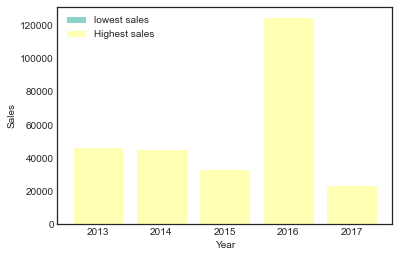

In [117]:
train_final['date']=pd.to_datetime(train_final['date']).dt.year
                                                              
#Group the sales data by year and find the year with the lowest sales 
min_sales_year=train_final.groupby('date')['sales'].idxmin()

#Group the sales data by year and find the year with the highest sales 
max_sales_year=train_final.groupby('date')['sales'].idxmax()

#plot the results using a bar chart
fig, ax=plt.subplots()
ax.bar(min_sales_year.index, train_final.loc[min_sales_year]['sales'],label='lowest sales')
ax.bar(max_sales_year.index, train_final.loc[max_sales_year]['sales'],label='Highest sales')
ax.legend()
ax.set_xlabel('Year')
ax.set_ylabel('Sales')

plt.show()

- It can be concluded here that each year recorded 0 as their lowest sales.
- It can also be said that 2016 had the highest sales, followed by 2013 it is also followed closely by 2014 with almsot the same salwes 
- It can also be noted that 2015 and 2017 recorded the lowest highest score among the the year

# Question 3: Are certain groups of stores selling more products? (Cluster, city, state, type)

In [99]:
store_data.head()

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4


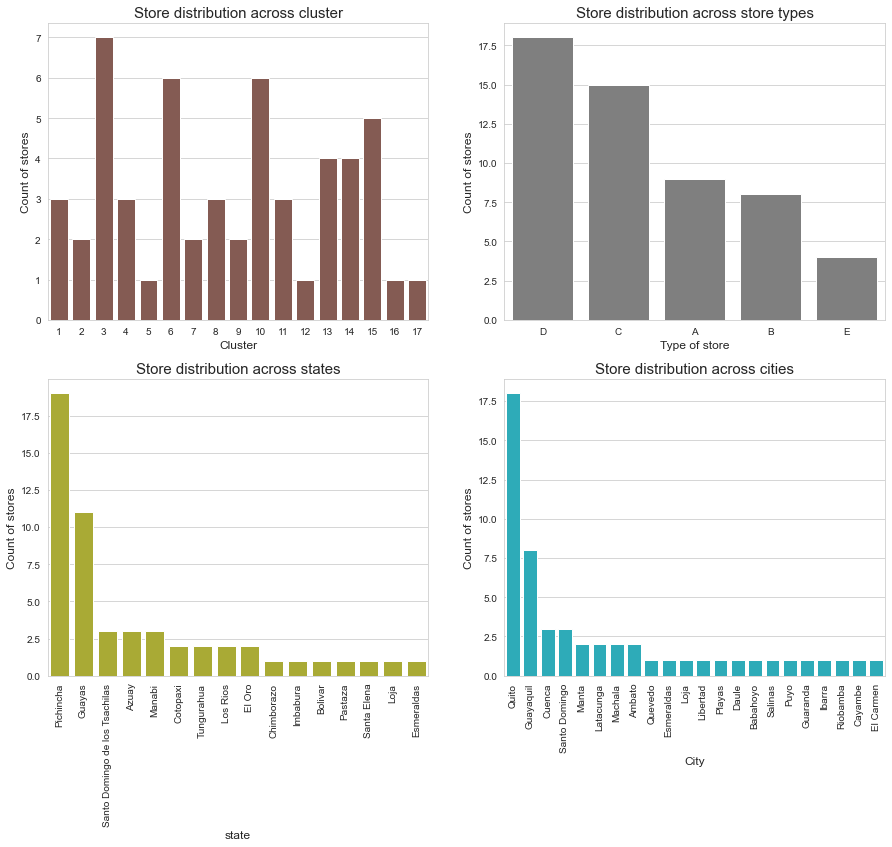

In [98]:
#Count of stores in different types and clusters
plt.figure(figsize=(15,12))
#row col plotnumber - 121
plt.subplot(221)
# Count of stores for each type 
temp = store_data['cluster'].value_counts()
#plot
sns.barplot(temp.index,temp.values,color=color[5])
plt.ylabel('Count of stores', fontsize=12)
plt.xlabel('Cluster', fontsize=12)
plt.title('Store distribution across cluster', fontsize=15)



plt.subplot(222)
# Count of stores for each type 
temp = store_data['type'].value_counts()
#plot
sns.barplot(temp.index,temp.values,color=color[7])
plt.ylabel('Count of stores', fontsize=12)
plt.xlabel('Type of store', fontsize=12)
plt.title('Store distribution across store types', fontsize=15)

plt.subplot(223)
# Count of stores for each type 
temp = store_data['state'].value_counts()
#plot
sns.barplot(temp.index,temp.values,color=color[8])
plt.ylabel('Count of stores', fontsize=12)
plt.xlabel('state', fontsize=12)
plt.title('Store distribution across states', fontsize=15)
plt.xticks(rotation='vertical')

plt.subplot(224)
# Count of stores for each type 
temp = store_data['city'].value_counts()
#plot
sns.barplot(temp.index,temp.values,color=color[9])
plt.ylabel('Count of stores', fontsize=12)
plt.xlabel('City', fontsize=12)
plt.title('Store distribution across cities', fontsize=15)
plt.xticks(rotation='vertical')
plt.show()

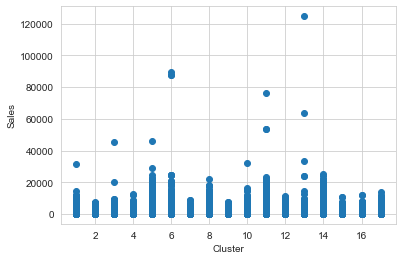

In [104]:
plt.scatter(train_final['cluster'], train_final['sales'])
#plot
plt.xlabel('Cluster')
plt.ylabel('Sales')



plt.show()

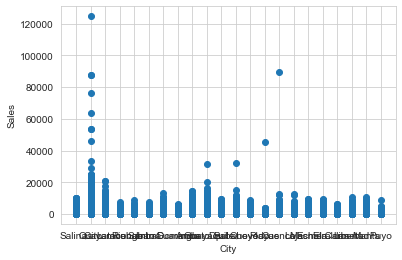

In [106]:
plt.scatter(train_final['city'], train_final['sales'])
#plot
plt.xlabel('City')
plt.ylabel('Sales')

plt.show()

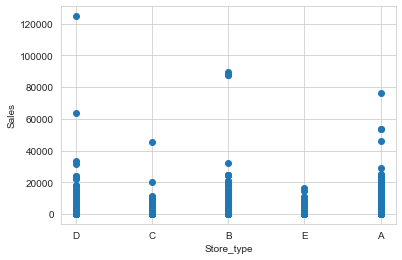

In [107]:
plt.scatter(train_final['store_type'], train_final['sales'])
#plot
plt.xlabel('Store_type')
plt.ylabel('Sales')



plt.show()


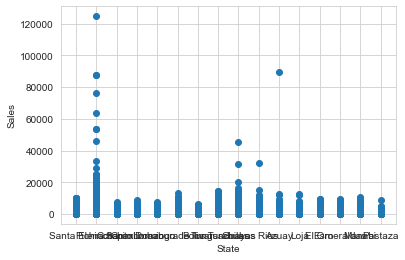

In [108]:
plt.scatter(train_final['state'], train_final['sales'])
#plot
plt.xlabel('State')
plt.ylabel('Sales')

plt.show()

# Question 4: Are sales affected by promotions, oil prices and holidays?

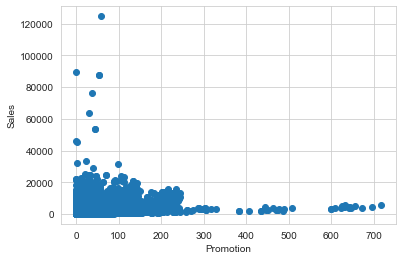

In [109]:
#creating a scatter plot of promotion vs sales
plt.scatter(train_final['onpromotion'],train_final['sales'])
plt.xlabel('Promotion')
plt.ylabel('Sales')

plt.show()

Yes, sales can be affected by promotion. When a product is promoted, it can increase consumer awareness and interest 
in the product, which can lead to an increase in sales. The effectiveness of the promotion will depend on a variety of 
factors, such as the type of promotion, the target audience and the product itself.

We can however conclude that, promotion didnt have any significant impact on sales as seen in the above scatter plot

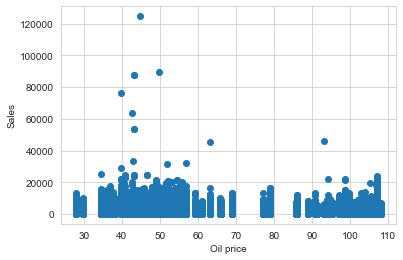

In [110]:
#creating a scatter plot of oil prices vs sales
plt.scatter(train_final['dcoilwtico'],train_final['sales'])
plt.xlabel('Oil price')
plt.ylabel('Sales')

plt.show()

It can observed from the scatter plot above that as prices of oil goes up, sales also reduces. So we can say that oil prices has negative correlation with sales or inversely propositonal to sales 

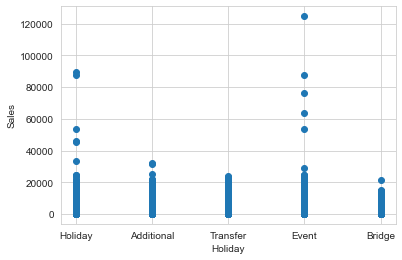

In [111]:
#creating a scatter plot of holiday_type vs sales
plt.scatter(train_final['holiday_type'],train_final['sales'])
plt.xlabel('Holiday')
plt.ylabel('Sales')

plt.show()

Yes, sales can be affected by Holidays. Holidays can lead to increased consumer spending due to factors such as gift-giving, travel
and seasonal purchases. Additionally, holidays can create a sense of urgency for consumers to make purchases, as they may be seeking to take advantage of sales or to meet gift-giving deadlines
The impact of holidays on sales will depend on various factors, such as the type of holiday, the products being sold , and 
the target auddience. For example, a holiday like Christmas is typically associated with gift-giving, which may incease
sales for retailers selling items such as toys, electronics, and clothing. Similarly,holidays like Memorial Day and Labour
day may increase sales for retailers selling items such as outdoor gear and home goods

We can conclude by sayign that, 
1. Holiday has significante impact on sales, from the above scatter plot we can on holidays sales increased, however
during Events sales increased more as compare to Holidays this can be attributed to alot factors
a. it could be because its a holiday people really want to rest rather than to go shopping 
b. during events people actually have to prepare some foods or other stuffs to suite the occasions.

# Question 5: What analysis can we get from the date and its extractable features?

### Date and its extractive features can provide valuable insights in data anaylysis. Here are some examples of analysis that can performed using date and its extractive features:
    1. Trend analysis: By extracting the year, month or day from a date, you can analyze trend over time. For Example 
        you can plot the number of sales per month over several years to see if there are any patterns or trends.
    2. Seasonal analysis: Extracting the month or quarter from the date can help you understand seasonal trends in your             data 
        For example, you might find that sales of certain item increases in a particular period while sales of different 
        item may also increase in a different period
    3. Time series analysis: Time series analysis is a statistical technique that uses historical data to make future
        predictions. Date and its extractive features are critical in time series analysis, as they help to idntify 
        patterns, seasonality, and trends in the data
    4. Holiday analysis: By extracting the day and month, you can identify holidays and special events that might 
        impact your data. For example, you might find that sales increase during the holiday season or that website 
        traffic is higher on cyber monday
        
Overall, date and its extractive features are essential for understanding trends, seasonality and patterns in data. 
By extracting and analyzing these features, you can gain valuable insights that can help you make data-driven decisions.

In [113]:
merged_train_store_holiday_transaction_oil.set_index('date', inplace=True)

In [114]:
merged_train_store_holiday_transaction_oil.head()

,id,store_nbr,family,sales,onpromotion,city,state,store_type,cluster,holiday_type,locale,locale_name,description,transferred,transactions,dcoilwtico
date,,,,,,,,,,,,,,,,
2013-01-01,561,25,AUTOMOTIVE,0.0,0,Salinas,Santa Elena,D,1,Holiday,National,Ecuador,Primer dia del ano,False,770,107.04
2013-01-01,562,25,BABY CARE,0.0,0,Salinas,Santa Elena,D,1,Holiday,National,Ecuador,Primer dia del ano,False,770,107.04
2013-01-01,563,25,BEAUTY,2.0,0,Salinas,Santa Elena,D,1,Holiday,National,Ecuador,Primer dia del ano,False,770,107.04
2013-01-01,564,25,BEVERAGES,810.0,0,Salinas,Santa Elena,D,1,Holiday,National,Ecuador,Primer dia del ano,False,770,107.04
2013-01-01,565,25,BOOKS,0.0,0,Salinas,Santa Elena,D,1,Holiday,National,Ecuador,Primer dia del ano,False,770,107.04


# Trend analysis in our sales 

In [115]:
monthly_sales=merged_train_store_holiday_transaction_oil.resample('M').sum()

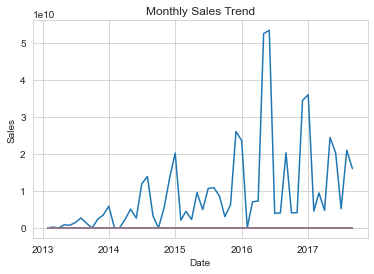

In [116]:
plt.plot(monthly_sales)
plt.title('Monthly Sales Trend')
plt.xlabel('Date')
plt.ylabel('Sales')

plt.show()

In [117]:
hypothesis_data=pd.merge(merged_train_store_holiday_transaction, oil_data, on='date')

In [118]:
#extracting year from the date column
hypothesis_data['year']=pd.to_datetime(hypothesis_data['date']).dt.year


#extracting month from the date column
hypothesis_data['month']=pd.to_datetime(hypothesis_data['date']).dt.month

#extracting day from the date column
hypothesis_data['day']=pd.to_datetime(hypothesis_data['date']).dt.day


#Group the dataframe by year and calculate the mean amount of sales
yearly_data=hypothesis_data.groupby('year')['sales'].mean()

#Group the dataframe by month and calculate the mean amount of sales 
monthly_data=hypothesis_data.groupby('month')['sales'].mean()


#Group the dataframe by day and calculate the mean amount of sales 
daily_data=hypothesis_data.groupby('day')['sales'].mean()

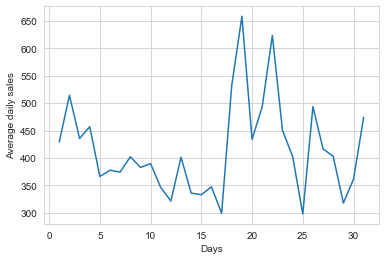

In [119]:
#Group the dataframe by day and calculate the mean amount of sales 
daily_data=hypothesis_data.groupby('day')['sales'].mean()

plt.plot(daily_data.index, daily_data.values)
plt.xlabel('Days')
plt.ylabel('Average daily sales')

plt.show()

From the commentary from the dataset, we were made aware that salaries are paid twice very each. First payment is on the 15th of the month and second is paid on a day before the month ends. From the graph above, we can say sales increased after 15th which is a true reflection of the reality. As people received salaries it is normal to spend. Sales dropped on 20th and saw a raise on the 30th. 

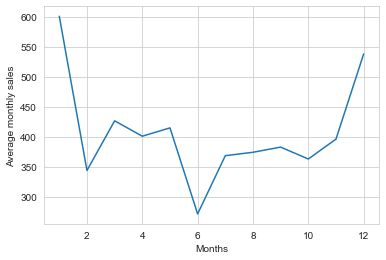

In [120]:
#Group the dataframe by month and calculate the mean amount of sales 
daily_data=hypothesis_data.groupby('month')['sales'].mean()

plt.plot(daily_data.index, daily_data.values)
plt.xlabel('Months')
plt.ylabel('Average monthly sales')

plt.show()

Here it can seen that middle of January saw a raise in sales. It declined in Feburary and finally dropped to its lowest in June. Sales begun to increase in from July to December. It can be concluded that there was an upward increased in sales from July to December.

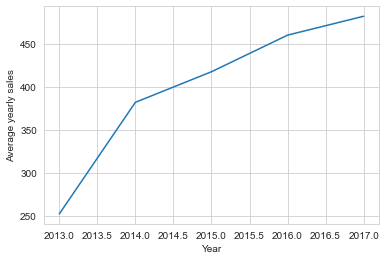

In [121]:
#Group the dataframe by Year and calculate the mean amount of sales 
daily_data=hypothesis_data.groupby('year')['sales'].mean()

plt.plot(daily_data.index, daily_data.values)
plt.xlabel('Year')
plt.ylabel('Average yearly sales')

plt.show()

On the average sales increased from 2013 to 2017. This can be attributed to several reasons such as increase in population or increased in promotional sales or finally dropped in prices.

# Trend Analysis - Transactions

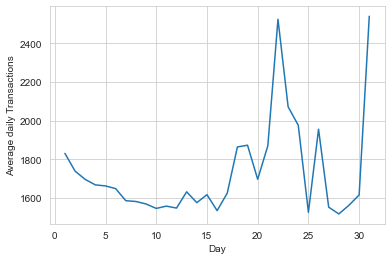

In [122]:
#Group the dataframe by day and calculate the average transactions 
daily_data=hypothesis_data.groupby('day')['transactions'].mean()

plt.plot(daily_data.index, daily_data.values)
plt.xlabel('Day')
plt.ylabel('Average daily Transactions')

plt.show()

We can observed a decline from begining of day 1 to 15 then rihgt from 15th we see a sharp increase. As salaries are paid on 15th its normal to see increase in transactions from 15th. From 22nd from 25th saw a sharp decline in transactions. Transaction also increased sharpely form 30th to 31st.

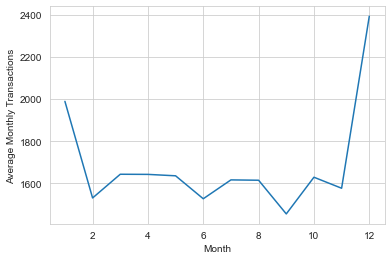

In [123]:
#Group the merged_train_store_holiday_transaction by day and calculate the average transactions 
monthly_data=hypothesis_data.groupby('month')['transactions'].mean()

plt.plot(monthly_data.index, monthly_data.values)
plt.xlabel('Month')
plt.ylabel('Average Monthly Transactions')

plt.show()

There is sharp decline in transactions right from Jan to Feb. On the contrary transactions increased sharply from Nov toward Dec. This can be attributed to so many factors. Some of these factors maybe because is Christmas and they need to buy so may items

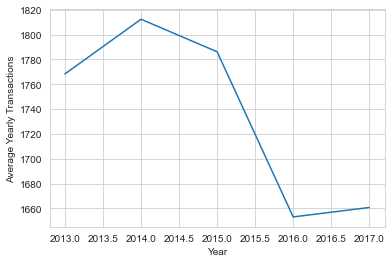

In [124]:
#Group the merged_train_store_holiday_transaction by year and calculate the average transactions 
yearly_day=hypothesis_data.groupby('year')['transactions'].mean()

plt.plot(yearly_day.index, yearly_day.values)
plt.xlabel('Year')
plt.ylabel('Average Yearly Transactions')

plt.show()

Transactions increased from 2013 to first half of 2014. We saw a drop in transacions from 2015 to 2016. Transaction started increasing from 2016

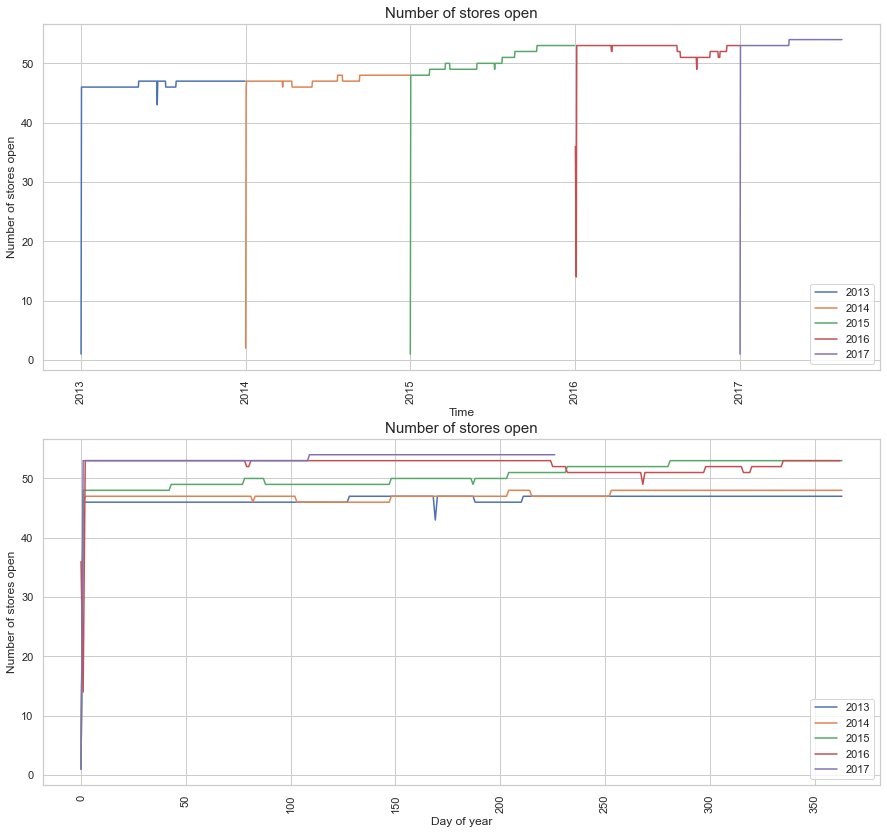

In [135]:
#transactions
# month over month sales
transaction_data['date']=pd.to_datetime(transaction_data['date'])
temp=transaction_data.groupby(['date']).aggregate({'store_nbr':'count','transactions':np.sum})
temp=temp.reset_index()
temp_2013=temp[temp['date'].dt.year==2013].reset_index(drop=True)
temp_2014=temp[temp['date'].dt.year==2014].reset_index(drop=True)
temp_2015=temp[temp['date'].dt.year==2015].reset_index(drop=True)
temp_2016=temp[temp['date'].dt.year==2016].reset_index(drop=True)
temp_2017=temp[temp['date'].dt.year==2017].reset_index(drop=True)
sns.set(style="whitegrid", color_codes=True)
plt.figure(figsize=(15,14))
plt.subplot(211)
plt.plot(temp_2013['date'],temp_2013.iloc[:,1],label="2013")
plt.plot(temp_2014['date'],temp_2014.iloc[:,1],label="2014")
plt.plot(temp_2015['date'],temp_2015.iloc[:,1],label="2015")
plt.plot(temp_2016['date'],temp_2016.iloc[:,1],label="2016")
plt.plot(temp_2017['date'],temp_2017.iloc[:,1],label="2017")
plt.ylabel('Number of stores open', fontsize=12)
plt.xlabel('Time', fontsize=12)
plt.title('Number of stores open', fontsize=15)
plt.xticks(rotation='vertical')
plt.legend(['2013', '2014', '2015', '2016', '2017'], loc='lower right')
plt.subplot(212)
plt.plot(temp_2013.index,temp_2013.iloc[:,1],label="2013")
plt.plot(temp_2014.index,temp_2014.iloc[:,1],label="2014")
plt.plot(temp_2015.index,temp_2015.iloc[:,1],label="2015")
plt.plot(temp_2016.index,temp_2016.iloc[:,1],label="2016")
plt.plot(temp_2017.index,temp_2017.iloc[:,1],label="2017")

plt.ylabel('Number of stores open', fontsize=12)
plt.xlabel('Day of year', fontsize=12)
plt.title('Number of stores open', fontsize=15)
plt.xticks(rotation='vertical')
plt.legend(['2013', '2014', '2015', '2016', '2017'], loc='lower right')

plt.show()

# Question 6: What is the difference between RMSLE, RMSE, MSE (or why is the MAE greater than all of them?)

RMSLE, MSE, RMSE and MAE are all error metrics used to evaluate the performance of regression models.
MSE(Mean Squared Error) measures the average squared difference between the predicted and actual values. It is calculated as the average 
of the squared differences between the predicted and actual values. MSE gives ore weight to larger errors and is sensitive to outliers.

1. RMSE (Root Mean Squared Error) is the square root of the MSE. 
It measures the average distance between the predicted and actual values, 
but since it is the square root of the MSE, it has the same units as the dependent variable. 
RMSE is sensitive to outliers and gives more weight to larger errors.

2. RMSLE (Root Mean Squared Logarithmic Error) is similar to RMSE, but takes the logarithm 
of the predicted and actual values before calculating the error. RMSLE is used when the dependent 
variable has a wide range of values and is skewed towards large values. It is less sensitive to outliers 
than RMSE.

3. MAE (Mean Absolute Error) measures the average absolute difference between the predicted and actual values. 
It is calculated as the average of the absolute differences between the predicted and actual values. MAE treats 
all errors equally, is less sensitive to outliers and is not affected by the scale of the dependent variable.

4. The MAE is greater than all of them because it does not give more weight to larger errors, unlike MSE and RMSE. 
Therefore, it may be more appropriate to use MAE when the model should be evaluated on the magnitude of the errors 
rather than their squared values


# Hypothesis testing using EDA method

**NULL: Earthquark has significant impact on sales**

**ALTERNATIVE: Earthquark has no significant impart on sales**

As we are made aware that earthquark of magnitude 7.8 struked Ecuador on the April 16, 2016.  
People rallied in relief efforts donating water and other first need products which greatly affected 
supermarket sales for several weeks after the earthquake.

So we have assumed that this will have significant impact on sales as people wont go shopping as usuall. It worth noting that 
this same situation can also lead to great increase as people will need different items to replaced the damaged ones.
To conclude on this we need to test this using our dataset 

In [126]:
merged_train_store_holiday_transaction['date']=pd.to_datetime(merged_train_store_holiday_transaction['date'])

In [127]:
merged_train_store_holiday_transaction['date']=merged_train_store_holiday_transaction['date'].dt.strftime('%Y-%m-%d')

In [128]:
hypothesis_data['date']=pd.to_datetime(hypothesis_data['date'])

## The basic idea is to  compare the sales before and after the earthquark and see if there is a significant difference between the two periods

In [129]:
#split data into before and after earthquark
sales_before_eq=hypothesis_data[hypothesis_data['date']<datetime(2016,4,16)]
sales_after_eq=hypothesis_data[hypothesis_data['date']>=datetime(2016,4,16)]

#calculate mean sales for before and after earthquark
mean_before_eq=sales_before_eq['sales'].mean()
mean_after_eq=sales_after_eq['sales'].mean()

# perform a t-test to compare the means
#t_stat, p_value=ttest_ind(sales_before_eq['sales'], sales_after_eq['sales'])

#print the results
print('Mean sales before earthquark:', mean_before_eq)
print('Mean sales after earthquark:', mean_after_eq)
#print('t-statistic:', t_stat)
#print('p-value:', p_value)

Mean sales before earthquark: 365.0347343382733
Mean sales after earthquark: 472.32591668410805


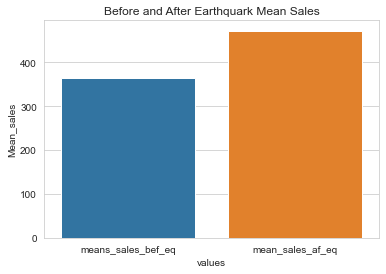

In [130]:
#converting the mean sales before and after earthquark into a dataframe 
data={'values':['means_sales_bef_eq','mean_sales_af_eq'], 'Mean_sales':[365.0347343382733,472.32591668410805]}
df=pd.DataFrame.from_dict(data)

sns.barplot(x='values',y='Mean_sales',data=df)
plt.title('Before and After Earthquark Mean Sales')

plt.show()

From the chart above, we can conclude that earthquark has no negatve impact on sales. Mean Sales after earthquark increased as compared to the mean sales before earthquark. 

# REGRESSION ANALYSIS

In [30]:
# join the dataset together for the regression analysis
merged1 = pd.merge(train, transactions, how='outer', on=['date', 'store_nbr'])
merged2 = pd.merge(merged1, holiday, how='outer', on='date')
merged3 = pd.merge(merged2, oil, how='outer', on='date')
merged_final = pd.merge(merged3, stores, how='outer', on='store_nbr')

In [31]:
merged_final.head()

,date,id,store_nbr,family,sales,onpromotion,transactions,type_x,locale,locale_name,description,transferred,dcoilwtico,city,state,type_y,cluster
0,2013-01-01,0.0,1.0,AUTOMOTIVE,0.0,0.0,NaN,Holiday,National,Ecuador,Primer dia del ano,False,94.756667,Quito,Pichincha,D,13.0
1,2013-01-01,1.0,1.0,BABY CARE,0.0,0.0,NaN,Holiday,National,Ecuador,Primer dia del ano,False,94.756667,Quito,Pichincha,D,13.0
2,2013-01-01,2.0,1.0,BEAUTY,0.0,0.0,NaN,Holiday,National,Ecuador,Primer dia del ano,False,94.756667,Quito,Pichincha,D,13.0
3,2013-01-01,3.0,1.0,BEVERAGES,0.0,0.0,NaN,Holiday,National,Ecuador,Primer dia del ano,False,94.756667,Quito,Pichincha,D,13.0
4,2013-01-01,4.0,1.0,BOOKS,0.0,0.0,NaN,Holiday,National,Ecuador,Primer dia del ano,False,94.756667,Quito,Pichincha,D,13.0


In [32]:
merged_final = merged_final.rename(columns={"type_x": "holiday_type", "type_y": "store_type"})
merged_final.head()

,date,id,store_nbr,family,sales,onpromotion,transactions,holiday_type,locale,locale_name,description,transferred,dcoilwtico,city,state,store_type,cluster
0,2013-01-01,0.0,1.0,AUTOMOTIVE,0.0,0.0,NaN,Holiday,National,Ecuador,Primer dia del ano,False,94.756667,Quito,Pichincha,D,13.0
1,2013-01-01,1.0,1.0,BABY CARE,0.0,0.0,NaN,Holiday,National,Ecuador,Primer dia del ano,False,94.756667,Quito,Pichincha,D,13.0
2,2013-01-01,2.0,1.0,BEAUTY,0.0,0.0,NaN,Holiday,National,Ecuador,Primer dia del ano,False,94.756667,Quito,Pichincha,D,13.0
3,2013-01-01,3.0,1.0,BEVERAGES,0.0,0.0,NaN,Holiday,National,Ecuador,Primer dia del ano,False,94.756667,Quito,Pichincha,D,13.0
4,2013-01-01,4.0,1.0,BOOKS,0.0,0.0,NaN,Holiday,National,Ecuador,Primer dia del ano,False,94.756667,Quito,Pichincha,D,13.0


In [33]:
merged_final.describe().T

,count,mean,std,min,25%,50%,75%,max
id,3054348.0,1.504277e+06,866261.012008,0.00,754676.75,1507571.50,2255120.250,3000887.00
store_nbr,3054348.0,2.750000e+01,15.585787,1.00,14.00,27.50,41.000,54.00
sales,3054348.0,3.590209e+02,1107.285897,0.00,0.00,11.00,196.011,124717.00
onpromotion,3054348.0,2.617480e+00,12.254939,0.00,0.00,0.00,0.000,741.00
transactions,2805231.0,1.697071e+03,966.831652,5.00,1046.00,1395.00,2081.000,8359.00
dcoilwtico,2175837.0,6.791923e+01,25.672600,26.19,46.53,53.38,95.610,110.62
cluster,3054348.0,8.481481e+00,4.649735,1.00,4.00,8.50,13.000,17.00


Here we are this final dataset (merged_final)for the regression analysis

In [34]:
# Check the correlation between sales and promotions
corr = train["sales"].corr(train["onpromotion"])

# Print the correlation coefficient
print("Correlation coefficient:", corr)

Correlation coefficient: 0.42792320481213236


In [35]:
#drop unnecessary columns
merged_final = merged_final.drop(columns=['id','locale', 'locale_name', 'description', 'transferred'])

In [36]:
le = LabelEncoder()

# Encoding categorical columns
merged_final['family'] = le.fit_transform(merged_final['family'])
merged_final['city'] = le.fit_transform(merged_final['city'])
merged_final['state'] = le.fit_transform(merged_final['state'])
merged_final['store_type'] = le.fit_transform(merged_final['store_type'])
merged_final['cluster'] = le.fit_transform(merged_final['cluster'])
merged_final['holiday_type'] = le.fit_transform(merged_final['holiday_type'])

In [37]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# selecting the numerical columns
numerical = ['store_nbr','family','sales', 'transactions', 'dcoilwtico','city', 'cluster']

# fit and transform the numerical columns
merged_final[numerical] = scaler.fit_transform(merged_final[numerical])

In [40]:
merged_final.sample()

,date,store_nbr,family,sales,onpromotion,transactions,holiday_type,dcoilwtico,city,state,store_type,cluster
1493059,2014-11-04,0.352886,-0.945208,1.133383,1.0,-0.392076,6,0.359557,0.709388,9,2,-1.178885


In [41]:
merged_final.dropna(subset=['sales'], inplace=True)

In [42]:
merged_final.head(2)

,date,store_nbr,family,sales,onpromotion,transactions,holiday_type,dcoilwtico,city,state,store_type,cluster
0,2013-01-01,-1.700267,-1.680335,-0.324235,0.0,NaN,3,1.045373,0.869009,12,3,0.971687
1,2013-01-01,-1.700267,-1.575317,-0.324235,0.0,NaN,3,1.045373,0.869009,12,3,0.971687


In [43]:
merged_final = merged_final.drop(columns=['state','date'])

# Spliting the Train Dataset

In [45]:
# splitting the dataset into train and test 
X_train, X_test, y_train, y_test = train_test_split(merged_final.drop('sales', axis=1), merged_final['sales'], test_size=0.2, random_state=42)

from sklearn.impute import SimpleImputer

# create an instance of the SimpleImputer class
imputer = SimpleImputer(strategy='mean')

# impute the missing values in your data
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)
# fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# evaluate the model on the test set
score = model.score(X_test, y_test)
print(f'R-squared score: {score:.2f}')

R-squared score: 0.24


In [46]:
#Replacing the missing values with the mean strategy
imputer = SimpleImputer(strategy='mean')

# impute the missing values in your data
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Modelling 

## Linear Regression Model

In [47]:
# prediction on the test dataset
y_pred = model.predict(X_test)

# Evaluate the Mean Squared Error
mse = mean_squared_error(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")

Mean Squared Error: 0.76


In [54]:
# Linear Regression Model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Make prediction on X_test
predit = lr.predict(X_test)

In [60]:
# Evaluation Metrics for Linear Regression
lr_mse = mean_squared_error(y_test, lr_predictions).round(2)
lr_rmse = np.sqrt(lr_mse)

# apply the absolute value function to y_test to remove negative signs
y_test_abs = abs(y_test)
lr_predictions_abs = abs(lr_predictions)

# calculate the mean squared logarithmic error using the new y_test_abs and lr_predictions_abs array
lr_rmsle = np.sqrt(mean_squared_log_error(y_test_abs, lr_predictions_abs))

# Print the evaluation results for Linear Regression model
print("\nEvaluation Results for Linear Regression:")
print("MSE:", lr_mse)
print("RMSE:", lr_rmse)
print("RMSLE:", lr_rmsle)


Evaluation Results for Linear Regression:
MSE: 0.76
RMSE: 0.8717797887081347
RMSLE: 0.29742496325713424


# Decision Trees model (DT)

In [62]:
# Decision Tree Regression Model
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)

# Make prediction on X_test
dt_predictions = dt.predict(X_test)

# Evaluation Metrics for Decision Tree Regression
dt_mse = mean_squared_error(y_test, dt_predictions).round(2)
dt_rmse = np.sqrt(dt_mse)

# Evaluation Metrics for Decision Tree Regression
dt_predictions_abs = abs(dt_predictions)

# calculate the mean squared logarithmic error using the new y_test_abs and dt_predictions_abs array
dt_rmsle = np.sqrt(mean_squared_log_error(y_test_abs, dt_predictions_abs)).round(2)

# Print the evaluation results for Decision Tree Regression model
print("\nEvaluation Results for Decision Tree Regression:")
print("MSE:", dt_mse)
print("RMSE:", dt_rmse)

print("RMLSE:", dt_rmsle)


Evaluation Results for Decision Tree Regression:
MSE: 0.16
RMSE: 0.4
RMLSE: 0.1


# Random Forest Regression Model

In [51]:
# Random Forest Regression Model
rf = RandomForestRegressor(n_estimators=20, random_state=42)
rf.fit(X_train, y_train)

# Make prediction on X_test
predit = rf.predict(X_test)

In [61]:
# Evaluation Metrics for Random Forest Regression
rf_mse = mean_squared_error(y_test, rf_predictions).round(2)
rf_rmse = np.sqrt(rf_mse).round(2)

# apply the absolute value function to y_test to remove negative signs
rf_predictions_abs = abs(rf_predictions)

# calculate the mean squared logarithmic error using the new y_test_abs and rf_predictions_abs array
rf_rmsle = np.sqrt(mean_squared_log_error(y_test_abs, rf_predictions_abs)).round(2)

# Print the evaluation results for Random Forest Regrression model
print("\nEvaluation Results for Random Forest:")
print("MSE:", rf_mse)
print("RMSE:", rf_rmse)
print("RMSLE:", rf_rmsle)


Evaluation Results for Random Forest:
MSE: 0.08
RMSE: 0.28
RMSLE: 0.08


## Summary of the results of both LR, RF, DT

In [63]:
#Summary of the results
evaluation_metrics = ['MSE', 'RMSE', 'RMSLE']
models = ['Linear Regression', 'Decision Tree', 'Random Forest']
results = [[lr_mse, lr_rmse, lr_rmsle],
           [dt_mse, dt_rmse, dt_rmsle],
           [rf_mse, rf_rmse, rf_rmsle]]
results_table = pd.DataFrame(data=results, columns=evaluation_metrics, index=models)

# Print the league table
print("Evaluation league table:\n", results_table)

Evaluation league table:
                     MSE     RMSE     RMSLE
Linear Regression  0.76  0.87178  0.297425
Decision Tree      0.16  0.40000  0.100000
Random Forest      0.08  0.28000  0.080000


## Summary of the analysis

The problem that was tackled is a regression problem. Three models were used to solve the problem: linear regression, decision tree, and random forest. The evaluation metrics used for comparing these models are the Mean Squared Error (MSE), Root Mean Squared Error (RMSE), and Root Mean Squared Logarithmic Error (RMSLE).

The linear regression model produced an MSE of 0.76, an RMSE of 0.87, and an RMSLE of 0.29. The decision tree model produced an MSE of 0.16, an RMSE of 0.40, and an RMSLE of 0.10. Finally, the random forest model produced an MSE of 0.08, an RMSE of 0.28, and an RMSLE of 0.08.

A lower value of MSE, RMSE, and RMSLE indicates better performance of the model. Based on the evaluation metrics, the random forest model performed the best with an MSE of 0.08, an RMSE of 0.28, and an RMSLE of 0.08. Therefore, the random forest model is a good choice to report as it provided the best performance among the three models.